In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Primary_dataset = pd.read_csv("/content/PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding="ISO-8859-1", low_memory=False)

In [ ]:
Primary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [ ]:
Primary_dataset.isnull().sum()

,0
PROVNUM,0
PROVNAME,0
CITY,0
STATE,0
COUNTY_NAME,0
COUNTY_FIPS,0
CY_Qtr,0
WorkDate,0
MDScensus,0
Hrs_RNDON,0


In [ ]:
Primary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [ ]:
Primary_dataset.head(5)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,335100,ISABELLA GERIATRIC CENTER INC,NEW YORK,NY,New York,61,2024Q1,20240118,670,7.43,...,102.67,1735.12,1040.82,694.30,0.0,0.0,0.0,0.0,0.0,0.0
1,335100,ISABELLA GERIATRIC CENTER INC,NEW YORK,NY,New York,61,2024Q1,20240313,686,9.25,...,165.24,1857.74,1168.56,689.18,0.0,0.0,0.0,0.0,0.0,0.0
2,335100,ISABELLA GERIATRIC CENTER INC,NEW YORK,NY,New York,61,2024Q1,20240222,678,10.43,...,173.29,1733.32,1044.77,688.55,0.0,0.0,0.0,0.0,0.0,0.0
3,335100,ISABELLA GERIATRIC CENTER INC,NEW YORK,NY,New York,61,2024Q1,20240328,684,7.57,...,150.38,1608.83,928.58,680.25,0.0,0.0,0.0,0.0,0.0,0.0
4,335100,ISABELLA GERIATRIC CENTER INC,NEW YORK,NY,New York,61,2024Q1,20240208,677,0.00,...,141.24,1626.50,960.14,666.36,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate total and contract hours for each role, summing across all rows
role_columns = {
    'RN Director of Nursing': ('Hrs_RNDON', 'Hrs_RNDON_ctr'),
    'RN with Admin': ('Hrs_RNadmin', 'Hrs_RNadmin_ctr'),
    'RN': ('Hrs_RN', 'Hrs_RN_ctr'),
    'LPN with Admin': ('Hrs_LPNadmin', 'Hrs_LPNadmin_ctr'),
    'LPN': ('Hrs_LPN', 'Hrs_LPN_ctr'),
    'CNA': ('Hrs_CNA', 'Hrs_CNA_ctr'),
    'Nurse Aide in Training': ('Hrs_NAtrn', 'Hrs_NAtrn_ctr'),
    'Med Aide/Technician': ('Hrs_MedAide', 'Hrs_MedAide_ctr')
}

In [ ]:
# Total hours for each role

Industry_staffing_summary_df = {'Role': [], 'Total Hours': [], 'Contract Hours': [], 'Contract Proportion': []}

for role, (total_col, contract_col) in role_columns.items():
    total_hours = Primary_dataset[total_col].sum()
    contract_hours = Primary_dataset[contract_col].sum()
    contract_proportion = contract_hours / total_hours if total_hours > 0 else 0

    Industry_staffing_summary_df['Role'].append(role)
    Industry_staffing_summary_df['Total Hours'].append(total_hours)
    Industry_staffing_summary_df['Contract Hours'].append(contract_hours)
    Industry_staffing_summary_df['Contract Proportion'].append(contract_proportion)

In [ ]:
#Convert to dataframe for visualization

Industry_staffing_summary_df = pd.DataFrame(Industry_staffing_summary_df)


In [ ]:
# Displaying the DataFrame for review
Industry_staffing_summary_df

,Role,Total Hours,Contract Hours,Contract Proportion
0,RN Director of Nursing,6.924489e+06,124692.24,0.018007
1,RN with Admin,1.365159e+07,324230.13,0.023750
2,RN,4.581662e+07,3943621.89,0.086074
3,LPN with Admin,8.847985e+06,101875.22,0.011514
4,LPN,8.825145e+07,8613375.90,0.097600
5,CNA,2.277974e+08,17268942.53,0.075808
6,Nurse Aide in Training,5.650951e+06,83015.73,0.014691
7,Med Aide/Technician,1.128575e+07,296553.51,0.026277


In [ ]:
plt.style.use('ggplot')

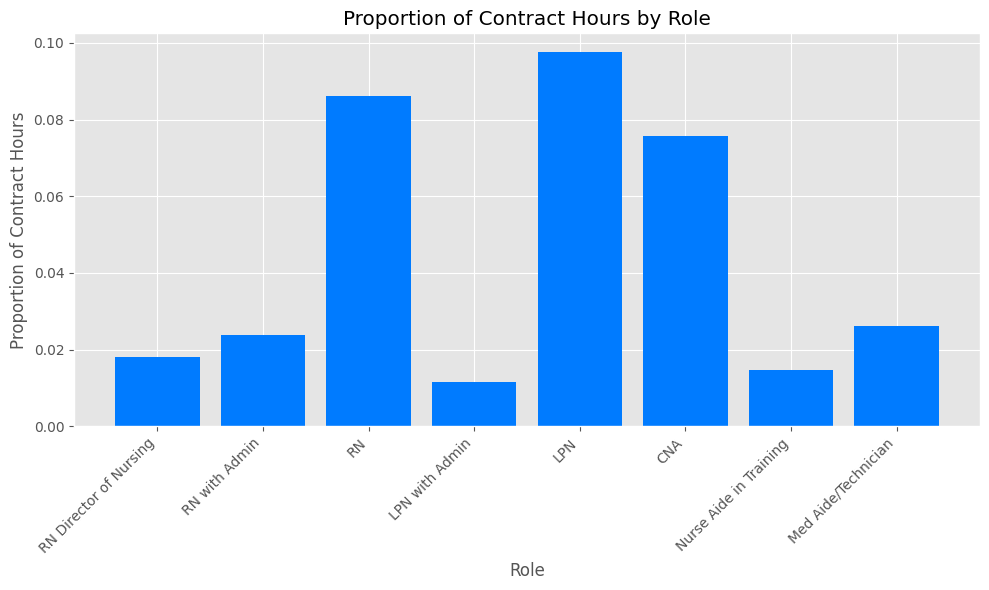

In [ ]:
#Visualization

plt.figure(figsize=(10, 6))
plt.bar(Industry_staffing_summary_df['Role'], Industry_staffing_summary_df['Contract Proportion'], color='#007BFF')
plt.xlabel('Role')
plt.ylabel('Proportion of Contract Hours')
plt.title('Proportion of Contract Hours by Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Let's see if we can get trends by region and see what roles have the highest turn over (Didn't take employees ratio into consideration beacsue ultimately, we are looking at Contractors, understanding contractor's hours provides better insight into profit maximization)


In [ ]:
# Summing up total and contract hours by state for regional analysis
regional_summary = Primary_dataset.groupby(['PROVNUM', 'PROVNAME', 'STATE']).agg({
    'Hrs_RNDON': 'sum',
    'Hrs_RNDON_ctr': 'sum',
    'Hrs_RNadmin': 'sum',
    'Hrs_RNadmin_ctr': 'sum',
    'Hrs_RN': 'sum',
    'Hrs_RN_ctr': 'sum',
    'Hrs_LPNadmin': 'sum',
    'Hrs_LPNadmin_ctr': 'sum',
    'Hrs_LPN': 'sum',
    'Hrs_LPN_ctr': 'sum',
    'Hrs_CNA': 'sum',
    'Hrs_CNA_ctr': 'sum',
    'Hrs_NAtrn': 'sum',
    'Hrs_NAtrn_ctr': 'sum',
    'Hrs_MedAide': 'sum',
    'Hrs_MedAide_ctr': 'sum'
}).reset_index()

In [ ]:
# Calculating total hours and contract hours across all roles for each state
regional_summary['Total Hours'] = (regional_summary['Hrs_RNDON'] + regional_summary['Hrs_RNadmin'] +
                                   regional_summary['Hrs_RN'] + regional_summary['Hrs_LPNadmin'] +
                                   regional_summary['Hrs_LPN'] + regional_summary['Hrs_CNA'] +
                                   regional_summary['Hrs_NAtrn'] + regional_summary['Hrs_MedAide'])

regional_summary['Contract Hours'] = (regional_summary['Hrs_RNDON_ctr'] + regional_summary['Hrs_RNadmin_ctr'] +
                                      regional_summary['Hrs_RN_ctr'] + regional_summary['Hrs_LPNadmin_ctr'] +
                                      regional_summary['Hrs_LPN_ctr'] + regional_summary['Hrs_CNA_ctr'] +
                                      regional_summary['Hrs_NAtrn_ctr'] + regional_summary['Hrs_MedAide_ctr'])

In [ ]:
# Calculating contractor proportion by state
regional_summary['Contract Proportion'] = regional_summary['Contract Hours'] / regional_summary['Total Hours']

In [ ]:
# Sorting states by contractor proportion to identify high-demand regions
regional_summary = regional_summary.sort_values(by='Contract Proportion', ascending=False)

In [ ]:
# Display the sorted regional summary for review
regional_summary

,PROVNUM,PROVNAME,STATE,Hrs_RNDON,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_ctr,Hrs_LPNadmin,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_ctr,Total Hours,Contract Hours,Contract Proportion
2461,115343,BERRIEN NURSING CENTER,GA,0.00,0.0,0.00,0.0,211.44,211.44,0.00,...,585.18,2931.83,2931.83,0.00,0.0,0.00,0.0,3728.45,3728.45,1.0
9197,355087,WEDGEWOOD MANOR,ND,0.00,0.0,0.00,0.0,112.24,112.24,0.00,...,133.00,2859.47,2859.47,0.00,0.0,0.00,0.0,3104.71,3104.71,1.0
7612,295048,HARMON HOSPITAL - SNF,NV,488.00,488.0,0.00,0.0,2665.61,2665.61,0.00,...,685.01,2192.38,2192.38,0.00,0.0,0.00,0.0,6031.00,6031.00,1.0
8029,315471,ST CATHERINE OF SIENA,NJ,0.00,0.0,63.50,63.5,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,63.50,63.50,1.0
2589,115551,CUMMING OPERATING COMPANY LLC,GA,0.00,0.0,653.00,653.0,2436.63,2436.63,0.00,...,9051.69,15268.80,15268.80,0.00,0.0,0.00,0.0,27410.12,27410.12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,245580,LAKEWOOD CARE CENTER,MN,456.00,0.0,400.00,0.0,1311.44,0.00,331.35,...,0.00,6719.10,0.00,0.00,0.0,0.00,0.0,10724.13,0.00,0.0
6618,245575,BARRETT CARE CENTER INC,MN,450.00,0.0,591.50,0.0,1751.50,0.00,515.25,...,0.00,9140.75,0.00,0.00,0.0,0.00,0.0,14723.25,0.00,0.0
6616,245573,CLARA CITY CARE CENTER,MN,479.00,0.0,1173.10,0.0,1233.40,0.00,0.00,...,0.00,7748.10,0.00,0.00,0.0,259.70,0.0,13261.50,0.00,0.0
6613,245569,HALSTAD LIVING CENTER,MN,449.19,0.0,0.00,0.0,2314.48,0.00,402.80,...,0.00,7199.43,0.00,0.00,0.0,1341.42,0.0,14509.74,0.00,0.0


In [ ]:
#Get the dataset to tablue for better visualization
Primary_dataset.to_csv('regional_summary', index=False)



In [ ]:
# Extract the desired columns
columns_to_extract = ['STATE', 'Total Hours', 'Contract Hours', 'Contract Proportion']
extracted_data = regional_summary[columns_to_extract]

# Save the extracted data to a new CSV file
extracted_data.to_csv('regional_summary_extracted.csv', index=False)

# Optional: Preview the extracted data to verify
print(extracted_data)


      STATE  Total Hours  Contract Hours  Contract Proportion
2461     GA      3728.45         3728.45                  1.0
9197     ND      3104.71         3104.71                  1.0
7612     NV      6031.00         6031.00                  1.0
8029     NJ        63.50           63.50                  1.0
2589     GA     27410.12        27410.12                  1.0
...     ...          ...             ...                  ...
6620     MN     10724.13            0.00                  0.0
6618     MN     14723.25            0.00                  0.0
6616     MN     13261.50            0.00                  0.0
6613     MN     14509.74            0.00                  0.0
14625    TX     23648.39            0.00                  0.0

[14626 rows x 4 columns]


In [ ]:
# Export to tablue for map graph
# State abbreviation to full state name mapping
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Step 2: Longitude and Latitude for each state (approximate values)
state_coordinates = {
    'Alabama': {'Longitude': -86.9023, 'Latitude': 32.8067},
    'Alaska': {'Longitude': -149.4937, 'Latitude': 61.3707},
    'Arizona': {'Longitude': -119.6816, 'Latitude': 33.7298},
    'Arkansas': {'Longitude': -92.3731, 'Latitude': 36.1431},
    'California': {'Longitude': -119.6816, 'Latitude': 36.1162},
    'Colorado': {'Longitude': -105.8701, 'Latitude': 39.0598},
    'Connecticut': {'Longitude': -72.7554, 'Latitude': 41.5978},
    'Delaware': {'Longitude': -75.5071, 'Latitude': 41.0250},
    'Florida': {'Longitude': -81.5158, 'Latitude': 27.7663},
    'Georgia': {'Longitude': -84.6701, 'Latitude': 33.0406},
    'Hawaii': {'Longitude': -155.6659, 'Latitude': 21.0943},
    'Idaho': {'Longitude': -114.7420, 'Latitude': 44.2998},
    'Illinois': {'Longitude': -88.2282, 'Latitude': 40.2989},
    'Indiana': {'Longitude': -86.2583, 'Latitude': 39.3498},
    'Iowa': {'Longitude': -93.5000, 'Latitude': 42.0115},
    'Kansas': {'Longitude': -98.3804, 'Latitude': 38.5266},
    'Kentucky': {'Longitude': -85.3021, 'Latitude': 37.6681},
    'Louisiana': {'Longitude': -91.1403, 'Latitude': 33.0041},
    'Maine': {'Longitude': -70.0000, 'Latitude': 44.2998},
    'Maryland': {'Longitude': -76.6413, 'Latitude': 39.0639},
    'Massachusetts': {'Longitude': -71.8191, 'Latitude': 42.2302},
    'Michigan': {'Longitude': -85.6024, 'Latitude': 43.3266},
    'Minnesota': {'Longitude': -93.9196, 'Latitude': 45.6945},
    'Mississippi': {'Longitude': -89.3985, 'Latitude': 32.7416},
    'Missouri': {'Longitude': -92.2884, 'Latitude': 36.6280},
    'Montana': {'Longitude': -110.3626, 'Latitude': 46.8797},
    'Nebraska': {'Longitude': -98.2681, 'Latitude': 41.1254},
    'Nevada': {'Longitude': -116.4194, 'Latitude': 38.3135},
    'New Hampshire': {'Longitude': -71.5639, 'Latitude': 33.8191},
    'New Jersey': {'Longitude': -74.5210, 'Latitude': 40.2989},
    'New Mexico': {'Longitude': -106.0651, 'Latitude': 34.1662},
    'New York': {'Longitude': -74.9473, 'Latitude': 40.2974},
    'North Carolina': {'Longitude': -79.8064, 'Latitude': 35.6301},
    'North Dakota': {'Longitude': -99.4388, 'Latitude': 47.5289},
    'Ohio': {'Longitude': -82.8029, 'Latitude': 40.3888},
    'Oklahoma': {'Longitude': -97.5393, 'Latitude': 35.5653},
    'Oregon': {'Longitude': -120.5724, 'Latitude': 44.5720},
    'Pennsylvania': {'Longitude': -77.2090, 'Latitude': 40.5908},
    'Rhode Island': {'Longitude': -71.5118, 'Latitude': 41.6809},
    'South Carolina': {'Longitude': -81.1637, 'Latitude': 33.8191},
    'South Dakota': {'Longitude': -99.4388, 'Latitude': 43.7467},
    'Tennessee': {'Longitude': -86.5804, 'Latitude': 35.7478},
    'Texas': {'Longitude': -97.5635, 'Latitude': 31.0545},
    'Utah': {'Longitude': -111.8624, 'Latitude': 40.1500},
    'Vermont': {'Longitude': -72.5778, 'Latitude': 44.0459},
    'Virginia': {'Longitude': -77.2090, 'Latitude': 37.7693},
    'Washington': {'Longitude': -120.7401, 'Latitude': 47.4009},
    'West Virginia': {'Longitude': -80.4549, 'Latitude': 38.4912},
    'Wisconsin': {'Longitude': -89.6165, 'Latitude': 44.2685},
    'Wyoming': {'Longitude': -107.3025, 'Latitude': 42.7550}
}

# Step 3: Load your existing data (replace 'regional_summary.csv' with the file you're working with)
df = pd.read_csv('regional_summary_extracted.csv')  # Make sure the file is correct

# Replace abbreviations with full state names in the 'State' column
df['STATE'] = df['STATE'].map(state_abbreviations).fillna(df['STATE'])

# Step 4: Add Longitude and Latitude to the dataset
df['Longitude'] = df['STATE'].map(lambda x: state_coordinates.get(x, {}).get('Longitude', None))
df['Latitude'] = df['STATE'].map(lambda x: state_coordinates.get(x, {}).get('Latitude', None))

# Step 5: Save the final dataframe to a new CSV file
df.to_csv('regional_summary_with_coordinates.csv', index=False)

# Display the first few rows to confirm
print(df.head())


          STATE  Total Hours  Contract Hours  Contract Proportion  Longitude  \
0       Georgia      3728.45         3728.45                  1.0   -84.6701   
1  North Dakota      3104.71         3104.71                  1.0   -99.4388   
2        Nevada      6031.00         6031.00                  1.0  -116.4194   
3    New Jersey        63.50           63.50                  1.0   -74.5210   
4       Georgia     27410.12        27410.12                  1.0   -84.6701   

   Latitude  
0   33.0406  
1   47.5289  
2   38.3135  
3   40.2989  
4   33.0406  


In [ ]:
#Get a list of top facility with higest dependencies on Contract staffs

facility_summary = regional_summary

In [ ]:
facility_summary.head()

,PROVNUM,PROVNAME,STATE,Hrs_RNDON,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_ctr,Hrs_LPNadmin,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_ctr,Total Hours,Contract Hours,Contract Proportion
2461,115343,BERRIEN NURSING CENTER,GA,0.0,0.0,0.0,0.0,211.44,211.44,0.0,...,585.18,2931.83,2931.83,0.0,0.0,0.0,0.0,3728.45,3728.45,1.0
9197,355087,WEDGEWOOD MANOR,ND,0.0,0.0,0.0,0.0,112.24,112.24,0.0,...,133.00,2859.47,2859.47,0.0,0.0,0.0,0.0,3104.71,3104.71,1.0
7612,295048,HARMON HOSPITAL - SNF,NV,488.0,488.0,0.0,0.0,2665.61,2665.61,0.0,...,685.01,2192.38,2192.38,0.0,0.0,0.0,0.0,6031.00,6031.00,1.0
8029,315471,ST CATHERINE OF SIENA,NJ,0.0,0.0,63.5,63.5,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,63.50,63.50,1.0
2589,115551,CUMMING OPERATING COMPANY LLC,GA,0.0,0.0,653.0,653.0,2436.63,2436.63,0.0,...,9051.69,15268.80,15268.80,0.0,0.0,0.0,0.0,27410.12,27410.12,1.0


In [ ]:
top_contract_reliant_facilities = facility_summary.sort_values(by='Contract Proportion', ascending=False).head(5)

In [ ]:
top_contract_reliant_facilities[['PROVNUM', 'PROVNAME', 'STATE', 'Total Hours', 'Contract Hours', 'Contract Proportion']]

,PROVNUM,PROVNAME,STATE,Total Hours,Contract Hours,Contract Proportion
2461,115343,BERRIEN NURSING CENTER,GA,3728.45,3728.45,1.0
9197,355087,WEDGEWOOD MANOR,ND,3104.71,3104.71,1.0
7612,295048,HARMON HOSPITAL - SNF,NV,6031.00,6031.00,1.0
8029,315471,ST CATHERINE OF SIENA,NJ,63.50,63.50,1.0
2589,115551,CUMMING OPERATING COMPANY LLC,GA,27410.12,27410.12,1.0


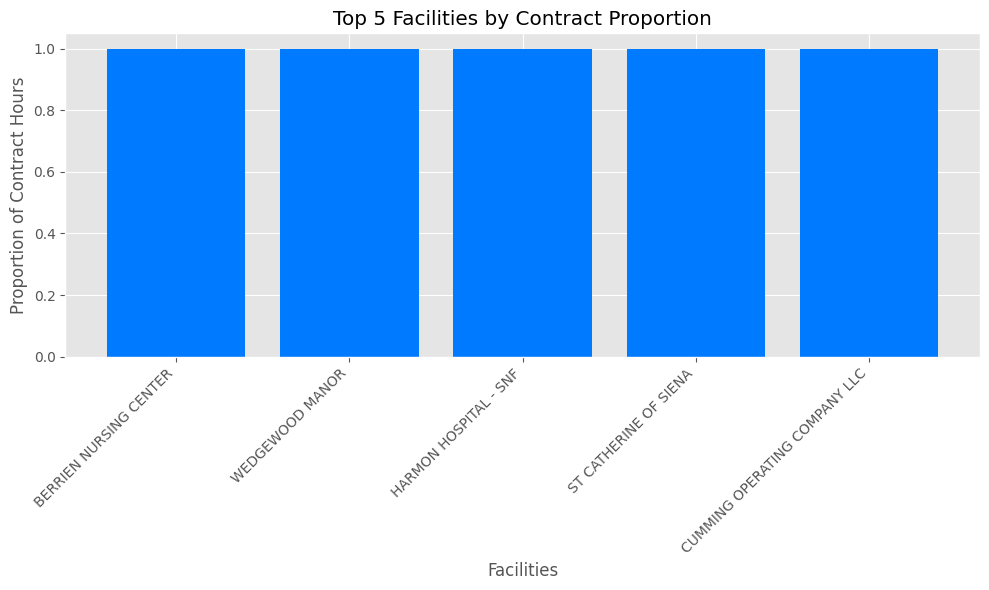

In [ ]:
# Re-checking the calculation and naming of the 'Contract_Proportion' column

# Ensure Contract_Proportion is calculated correctly
facility_summary['Contract_Proportion'] = facility_summary['Contract Hours'] / facility_summary['Total Hours']

# Sort facilities by contractor proportion to get top 5 facilities with the highest contractor reliance
facility_summary_sorted = facility_summary.sort_values(by='Contract Proportion', ascending=False)
top_5_facilities = facility_summary_sorted.head(5)

# Plotting Contract Proportion for the top 5 facilities
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.bar(top_5_facilities['PROVNAME'], top_5_facilities['Contract Proportion'], color='#007BFF')
plt.xlabel('Facilities')
plt.ylabel('Proportion of Contract Hours')
plt.title('Top 5 Facilities by Contract Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


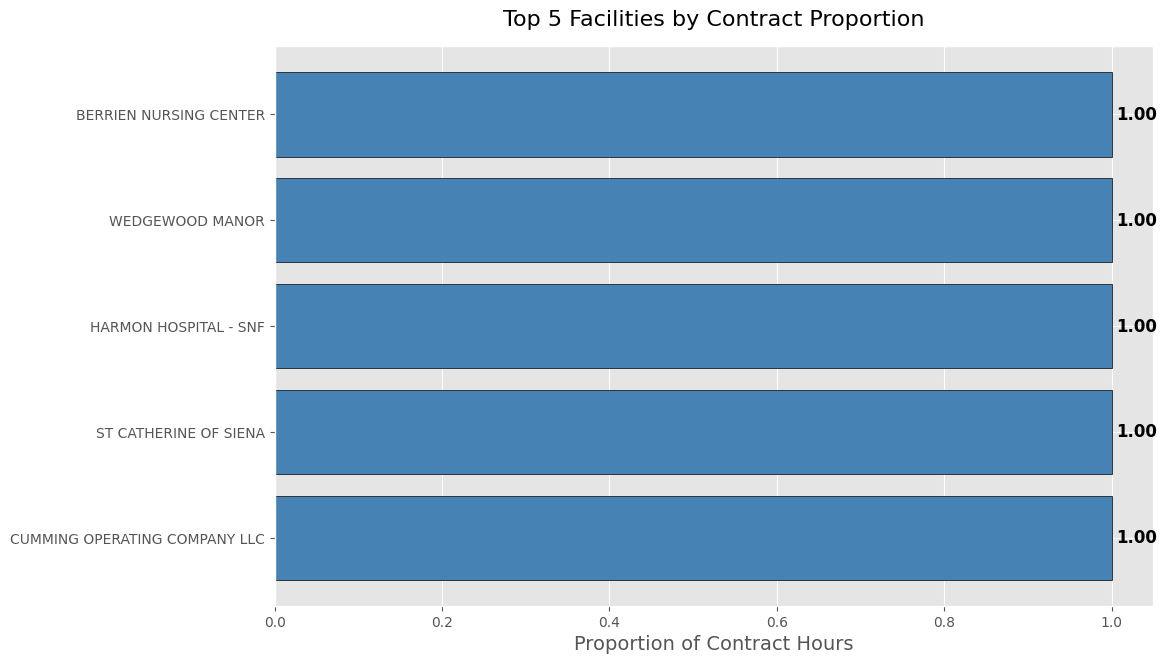

In [ ]:
# Using an available built-in style to ensure compatibility
plt.style.use('ggplot')  # 'ggplot' is available in most environments

# Re-plotting the horizontal bar chart with enhancements
plt.figure(figsize=(12, 7))

# Horizontal bar chart with distinct color and edge
bars = plt.barh(top_5_facilities['PROVNAME'], top_5_facilities['Contract_Proportion'], color='#4682B4', edgecolor='black')
plt.xlabel('Proportion of Contract Hours', fontsize=14)
plt.title('Top 5 Facilities by Contract Proportion', fontsize=16, pad=15)

# Adding bold text labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", va='center', ha='left', fontsize=12, color='black', weight='bold')

# Final adjustments for layout and axis inversion
plt.tight_layout(pad=2.0)
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


In [ ]:
facilities_performance = pd.read_csv("/content/FY_2024_SNF_VBP_Facility_Performance.csv")

In [ ]:
file_paths = {
    "FY_2024_SNF_VBP_Aggregate_Performance": "/content/FY_2024_SNF_VBP_Aggregate_Performance.csv",
    "FY_2024_SNF_VBP_Facility_Performance": "/content/FY_2024_SNF_VBP_Facility_Performance.csv",
    "NH_FireSafetyCitations": "/content/NH_FireSafetyCitations_Oct2024.csv",
    "NH_Penalties": "/content/NH_Penalties_Oct2024.csv",
    "NH_QualityMsr_Claims": "/content/NH_QualityMsr_Claims_Oct2024.csv",
    "NH_QualityMsr_MDS": "/content/NH_QualityMsr_MDS_Oct2024.csv"
}

In [ ]:
# Load datasets
datasets = {name: pd.read_csv(path, low_memory=False) for name, path in file_paths.items()}


In [ ]:
# Display the first few rows of each dataset to understand structure
dataset_heads = {name: df.head() for name, df in datasets.items()}
dataset_heads

{'FY_2024_SNF_VBP_Aggregate_Performance':    Baseline Period: FY 2019 National Average Readmission Rate  \
 0                                            0.19788            
 
    Performance Period: FY 2022 National Average Readmission Rate  \
 0                                            0.20223               
 
    FY 2024 Achievement Threshold  FY 2024 Benchmark  \
 0                        0.79271            0.83033   
 
   Range of Performance Scores  \
 0           0.00000-100.00000   
 
    Total Number of SNFs Receiving Value-Based Incentive Payments  \
 0                                              10858               
 
   Range of Incentive Payment Multipliers  \
 0              0.9802538758-1.0176785153   
 
   Range of Value-Based Incentive Payments ($)  \
 0        To be added after the end of FY 2024   
 
   Total Amount of Value-Based Incentive Payments ($)  
 0               To be added after the end of FY 2024  ,
 'FY_2024_SNF_VBP_Facility_Performance':    SNF VBP Pr

In [ ]:
#Merge Primary Staffing Data with FY_2024_SNF_VBP_Facility_Performance data on CMS Certification Number (CCN)

# Renaming 'CMS Certification Number (CCN)' to 'PROVNUM' in the performance data for consistent merging
performance_data = datasets["FY_2024_SNF_VBP_Facility_Performance"].rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'})

In [ ]:
performance_data = datasets["FY_2024_SNF_VBP_Facility_Performance"].rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'})

In [ ]:
performance_data.head()

,SNF VBP Program Ranking,Footnote -- SNF VBP Program Ranking,PROVNUM,Provider Name,Provider Address,City/Town,State,ZIP Code,Baseline Period: FY 2019 Risk-Standardized Readmission Rate,Footnote -- Baseline Period: FY 2019 Risk-Standardized Readmission Rate,Performance Period: FY 2022 Risk-Standardized Readmission Rate,Footnote -- Performance Period: FY 2022 Risk-Standardized Readmission Rate,Achievement Score,Footnote -- Achievement Score,Improvement Score,Footnote -- Improvement Score,Performance Score,Footnote -- Performance Score,Incentive Payment Multiplier,Footnote -- Incentive Payment Multiplier
0,7275,NaN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,0.20018,NaN,0.23768,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.980254,NaN
1,602,NaN,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,0.17051,NaN,0.17070,NaN,92.53589,NaN,0.00000,NaN,92.53589,NaN,1.017401,NaN
2,712,NaN,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,0.18901,NaN,0.17240,NaN,88.46890,NaN,80.88418,NaN,88.46890,NaN,1.017140,NaN
3,2966,NaN,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,0.18295,NaN,0.18755,NaN,52.22488,NaN,0.00000,NaN,52.22488,NaN,1.001067,NaN
4,791,NaN,10065,RUSSELL MEDICAL CENTER,3316 HIGHWAY 280,ALEXANDER CITY,AL,35010,0.19672,NaN,0.17320,NaN,86.55502,NaN,81.95009,NaN,86.55502,NaN,1.016977,NaN


In [ ]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   SNF VBP Program Ranking                                                     10858 non-null  int64  
 1   Footnote -- SNF VBP Program Ranking                                         0 non-null      float64
 2   PROVNUM                                                                     10858 non-null  int64  
 3   Provider Name                                                               10858 non-null  object 
 4   Provider Address                                                            10858 non-null  object 
 5   City/Town                                                                   10858 non-null  object 
 6   State                                         

In [ ]:
facility_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 2461 to 14625
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROVNUM              14626 non-null  object 
 1   PROVNAME             14626 non-null  object 
 2   STATE                14626 non-null  object 
 3   Hrs_RNDON            14626 non-null  float64
 4   Hrs_RNDON_ctr        14626 non-null  float64
 5   Hrs_RNadmin          14626 non-null  float64
 6   Hrs_RNadmin_ctr      14626 non-null  float64
 7   Hrs_RN               14626 non-null  float64
 8   Hrs_RN_ctr           14626 non-null  float64
 9   Hrs_LPNadmin         14626 non-null  float64
 10  Hrs_LPNadmin_ctr     14626 non-null  float64
 11  Hrs_LPN              14626 non-null  float64
 12  Hrs_LPN_ctr          14626 non-null  float64
 13  Hrs_CNA              14626 non-null  float64
 14  Hrs_CNA_ctr          14626 non-null  float64
 15  Hrs_NAtrn            14626 non-null  f

In [ ]:
# Ensure PROVNUM columns are of the same data type for merging
facility_summary['PROVNUM'] = facility_summary['PROVNUM'].astype(str)
performance_data['PROVNUM'] = performance_data['PROVNUM'].astype(str)

In [ ]:
# Merge staffing data with facility performance data
staffing_performance_merged = pd.merge(facility_summary, performance_data, on='PROVNUM', how='inner')

In [ ]:
staffing_performance_merged.head()


,PROVNUM,PROVNAME,STATE,Hrs_RNDON,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_ctr,Hrs_LPNadmin,...,Performance Period: FY 2022 Risk-Standardized Readmission Rate,Footnote -- Performance Period: FY 2022 Risk-Standardized Readmission Rate,Achievement Score,Footnote -- Achievement Score,Improvement Score,Footnote -- Improvement Score,Performance Score,Footnote -- Performance Score,Incentive Payment Multiplier,Footnote -- Incentive Payment Multiplier
0,115343,BERRIEN NURSING CENTER,GA,0.0,0.0,0.00,0.00,211.44,211.44,0.00,...,0.23754,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.980254,NaN
1,115551,CUMMING OPERATING COMPANY LLC,GA,0.0,0.0,653.00,653.00,2436.63,2436.63,0.00,...,0.20516,NaN,10.09569,NaN,0.00000,NaN,10.09569,NaN,0.980689,NaN
2,345296,MARGATE HEALTH AND REHAB CENTER,NC,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.18105,NaN,67.77512,NaN,50.59891,NaN,67.77512,NaN,1.012447,NaN
3,105910,CORAL REEF SUBACUTE CARE CENTER LLC,FL,280.0,280.0,2102.74,2102.74,15726.06,15726.06,0.00,...,0.19890,NaN,25.07177,NaN,29.91427,NaN,29.91427,NaN,0.984488,NaN
4,675980,HILL COUNTRY NURSING AND REHAB,TX,0.0,0.0,0.00,0.00,782.64,782.64,1051.04,...,0.20921,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.980254,NaN


In [ ]:
staffing_performance_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 42 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   PROVNUM                                                                     9347 non-null   object 
 1   PROVNAME                                                                    9347 non-null   object 
 2   STATE                                                                       9347 non-null   object 
 3   Hrs_RNDON                                                                   9347 non-null   float64
 4   Hrs_RNDON_ctr                                                               9347 non-null   float64
 5   Hrs_RNadmin                                                                 9347 non-null   float64
 6   Hrs_RNadmin_ctr                                 

## Analyze Performance Based on Contractor Reliance:
### AIM
Calculate contract reliance for each facility and analyze if facilities with high contractor reliance tend to have lower performance scores or higher readmission rates.

In [ ]:

# Calculate total hours and contractor reliance
staffing_performance_merged['Total_Hours'] = (
    staffing_performance_merged['Hrs_RNDON'] + staffing_performance_merged['Hrs_RNadmin'] +
    staffing_performance_merged['Hrs_RN'] + staffing_performance_merged['Hrs_LPN'] +
    staffing_performance_merged['Hrs_CNA'] + staffing_performance_merged['Hrs_NAtrn'] +
    staffing_performance_merged['Hrs_MedAide']
)

staffing_performance_merged['Contract_Hours'] = (
    staffing_performance_merged['Hrs_RNDON_ctr'] + staffing_performance_merged['Hrs_RNadmin_ctr'] +
    staffing_performance_merged['Hrs_RN_ctr'] + staffing_performance_merged['Hrs_LPN_ctr'] +
    staffing_performance_merged['Hrs_CNA_ctr'] + staffing_performance_merged['Hrs_NAtrn_ctr'] +
    staffing_performance_merged['Hrs_MedAide_ctr']
)


In [ ]:
# Calculate contractor proportion
Contractor_Reliance = regional_summary['Contract Proportion']





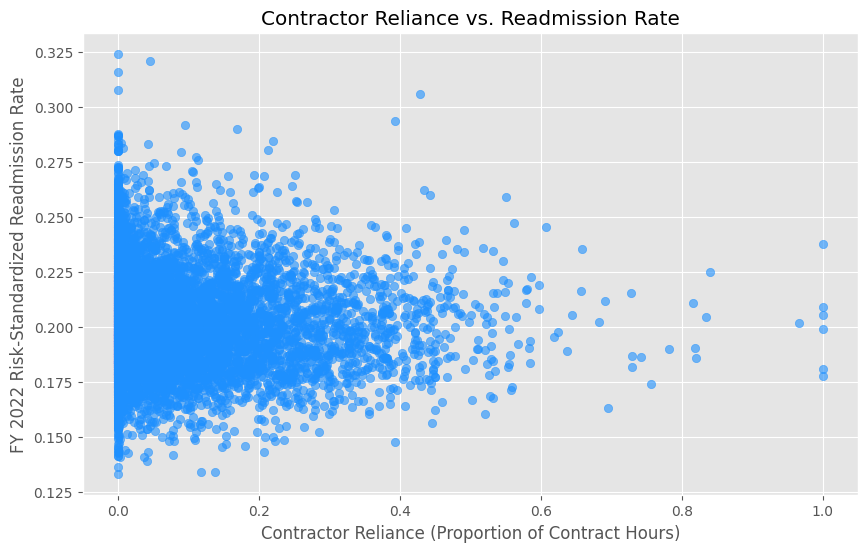

In [ ]:
# Scatter plot: Contractor Reliance vs. Readmission Rate
plt.figure(figsize=(10, 6))
plt.scatter(staffing_performance_merged['Contract Proportion'],
            staffing_performance_merged['Performance Period: FY 2022 Risk-Standardized Readmission Rate'],
            alpha=0.6, color='dodgerblue')
plt.xlabel('Contractor Reliance (Proportion of Contract Hours)')
plt.ylabel('FY 2022 Risk-Standardized Readmission Rate')
plt.title('Contractor Reliance vs. Readmission Rate')
plt.grid(True)
plt.show()


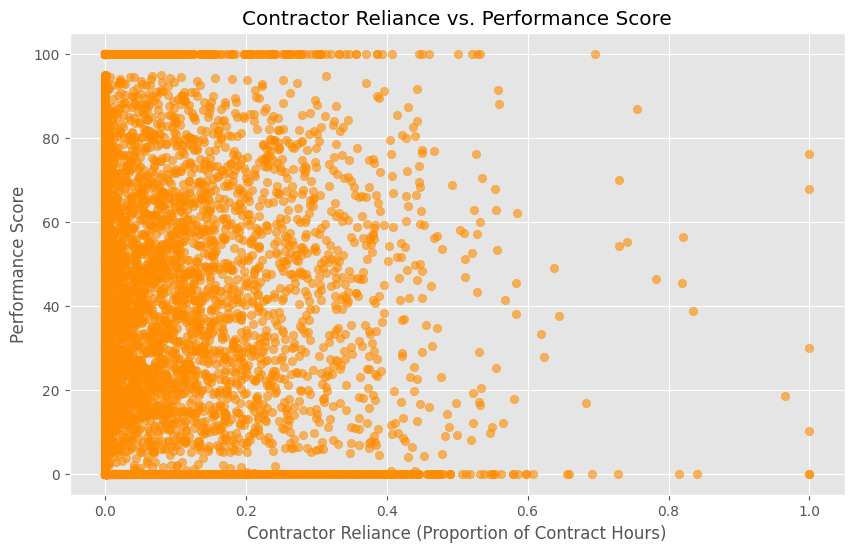

In [ ]:
# Scatter plot: Contractor Reliance vs. Performance Score
plt.figure(figsize=(10, 6))
plt.scatter(staffing_performance_merged['Contract Proportion'],
            staffing_performance_merged['Performance Score'],
            alpha=0.6, color='darkorange')
plt.xlabel('Contractor Reliance (Proportion of Contract Hours)')
plt.ylabel('Performance Score')
plt.title('Contractor Reliance vs. Performance Score')
plt.grid(True)
plt.show()

In [ ]:
# Step 2: Merge Primary Staffing Data with NH_FireSafetyCitations and NH_Penalties data

# Load the fire safety and penalties data
fire_safety = datasets["NH_FireSafetyCitations"].rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'})
penalties = datasets["NH_Penalties"].rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'})

# Convert PROVNUM to string for consistent merging
fire_safety['PROVNUM'] = fire_safety['PROVNUM'].astype(str)
penalties['PROVNUM'] = penalties['PROVNUM'].astype(str)




In [ ]:
penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28505 entries, 0 to 28504
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PROVNUM                        28505 non-null  object 
 1   Provider Name                  28505 non-null  object 
 2   Provider Address               28505 non-null  object 
 3   City/Town                      28505 non-null  object 
 4   State                          28505 non-null  object 
 5   ZIP Code                       28505 non-null  int64  
 6   Penalty Date                   28505 non-null  object 
 7   Penalty Type                   28505 non-null  object 
 8   Fine Amount                    25338 non-null  float64
 9   Payment Denial Start Date      3167 non-null   object 
 10  Payment Denial Length in Days  3167 non-null   float64
 11  Location                       28505 non-null  object 
 12  Processing Date                28505 non-null 

In [ ]:
# Merge staffing data with fire safety and penalties data
staffing_fire_safety_merged = pd.merge(Primary_dataset, fire_safety, on='PROVNUM', how='inner')
staffing_penalties_merged = pd.merge(Primary_dataset, penalties, on='PROVNUM', how='inner')



In [ ]:
# Summarizing to find the total number of citations and penalties per facility
fire_safety_summary = staffing_fire_safety_merged.groupby('PROVNUM').size().reset_index(name='Fire_Safety_Citations')
penalties_summary = staffing_penalties_merged.groupby('PROVNUM').size().reset_index(name='Total_Penalties')

# Merging the summaries back to staffing data
staffing_fire_penalties_merged = pd.merge(data, fire_safety_summary, on='PROVNUM', how='left')
staffing_fire_penalties_merged = pd.merge(staffing_fire_penalties_merged, penalties_summary, on='PROVNUM', how='left')

# Fill NaN values with 0 for facilities with no citations or penalties
staffing_fire_penalties_merged['Fire_Safety_Citations'].fillna(0, inplace=True)
staffing_fire_penalties_merged['Total_Penalties'].fillna(0, inplace=True)

# Display the resulting merged dataset
staffing_fire_penalties_merged[['PROVNUM', 'PROVNAME', 'STATE', 'Fire_Safety_Citations', 'Total_Penalties']].head()

NameError: name 'staffing_fire_safety_merged' is not defined

In [ ]:
# Calculate Contractor Reliance in the merged dataset (staffing_fire_penalties_merged)

# Calculating total hours and contractor reliance for this dataset
staffing_fire_penalties_merged['Total_Hours'] = (
    staffing_fire_penalties_merged['Hrs_RNDON'] + staffing_fire_penalties_merged['Hrs_RNadmin'] +
    staffing_fire_penalties_merged['Hrs_RN'] + staffing_fire_penalties_merged['Hrs_LPN'] +
    staffing_fire_penalties_merged['Hrs_CNA'] + staffing_fire_penalties_merged['Hrs_NAtrn'] +
    staffing_fire_penalties_merged['Hrs_MedAide']
)

staffing_fire_penalties_merged['Contract_Hours'] = (
    staffing_fire_penalties_merged['Hrs_RNDON_ctr'] + staffing_fire_penalties_merged['Hrs_RNadmin_ctr'] +
    staffing_fire_penalties_merged['Hrs_RN_ctr'] + staffing_fire_penalties_merged['Hrs_LPN_ctr'] +
    staffing_fire_penalties_merged['Hrs_CNA_ctr'] + staffing_fire_penalties_merged['Hrs_NAtrn_ctr'] +
    staffing_fire_penalties_merged['Hrs_MedAide_ctr']
)

# Calculate contractor reliance as a proportion of contract hours
staffing_fire_penalties_merged['Contractor_Reliance'] = staffing_fire_penalties_merged['Contract_Hours'] / staffing_fire_penalties_merged['Total_Hours']

# Scatter plot: Contractor Reliance vs. Fire Safety Citations
plt.figure(figsize=(10, 6))
plt.scatter(staffing_fire_penalties_merged['Contractor_Reliance'],
            staffing_fire_penalties_merged['Fire_Safety_Citations'],
            alpha=0.6, color='firebrick')
plt.xlabel('Contractor Reliance (Proportion of Contract Hours)')
plt.ylabel('Number of Fire Safety Citations')
plt.title('Contractor Reliance vs. Fire Safety Citations')
plt.grid(True)
plt.show()

# Scatter plot: Contractor Reliance vs. Total Penalties
plt.figure(figsize=(10, 6))
plt.scatter(staffing_fire_penalties_merged['Contractor_Reliance'],
            staffing_fire_penalties_merged['Total_Penalties'],
            alpha=0.6, color='forestgreen')
plt.xlabel('Contractor Reliance (Proportion of Contract Hours)')
plt.ylabel('Total Number of Penalties')
plt.title('Contractor Reliance vs. Total Penalties')
plt.grid(True)
plt.show()
